<a href="https://colab.research.google.com/github/arunkumardev-07/19AI413-deep-learning/blob/main/exp_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Arunkumar/212222040016")

Arunkumar/212222040016


In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
 X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[29956]

In [6]:
single_image.shape

(28, 28)

Arunkumar/212222040016


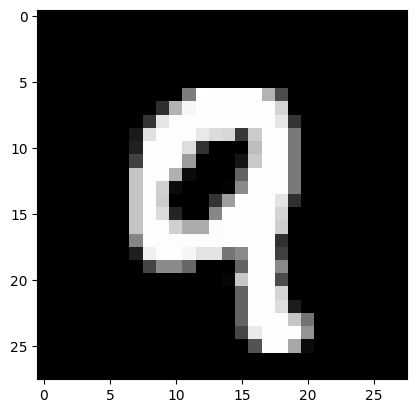

In [7]:
plt.imshow(single_image,cmap='gray')

y_train.shape

X_train.min()

X_train.max()

print("Arunkumar/212222040016")

In [8]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0


In [9]:
X_train_scaled.min()

X_train_scaled.max()

y_train[0]

5

In [10]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [11]:
type(y_train_onehot)

y_train_onehot.shape

(60000, 10)

Arunkumar/212222040016


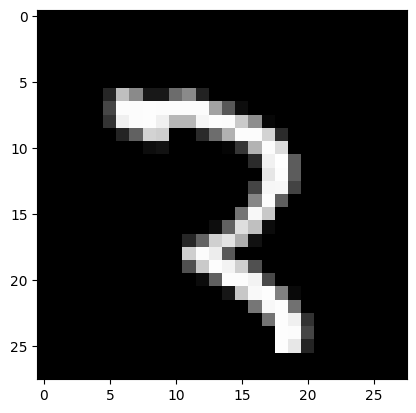

In [12]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')
print("Arunkumar/212222040016")

In [13]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [14]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [15]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D (pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         173,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 173,738 (678.66 KB)

 Trainable params: 173,738 (678.66 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 31ms/step - accuracy: 0.8690 - loss: 0.4582 - val_accuracy: 0.9735 - val_loss: 0.0900
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 28ms/step - accuracy: 0.9764 - loss: 0.0813 - val_accuracy: 0.9791 - val_loss: 0.0663
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9832 - loss: 0.0566 - val_accuracy: 0.9814 - val_loss: 0.0551
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9865 - loss: 0.0460 - val_accuracy: 0.9837 - val_loss: 0.0493
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 30ms/step - accuracy: 0.9895 - loss: 0.0356 - val_accuracy: 0.9826 - val_loss: 0.0509


Arunkumar/212222040016


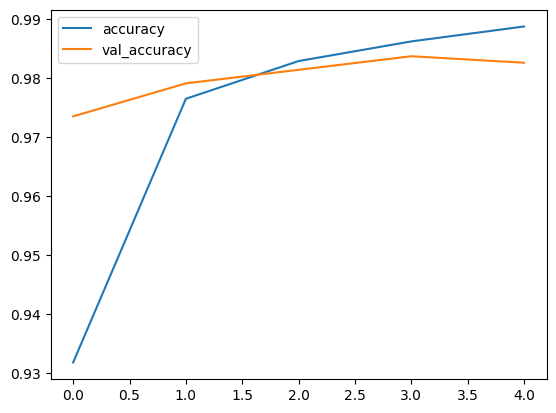

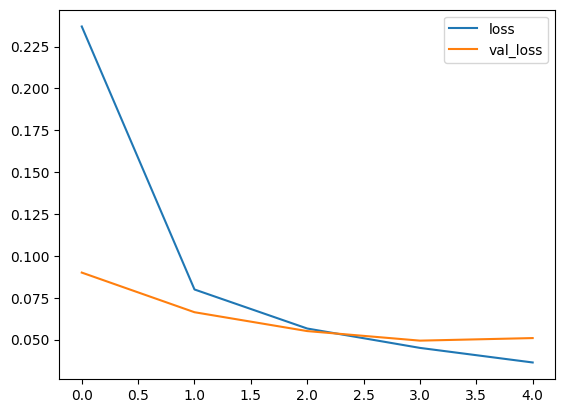

In [19]:
metrics = pd.DataFrame(model.history.history)

metrics[['accuracy','val_accuracy']].plot()

(metrics[['loss','val_loss']].plot())

print("Arunkumar/212222040016")

In [20]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

print(confusion_matrix(y_test,x_test_predictions))

print(classification_report(y_test,x_test_predictions))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
[[ 971    0    3    0    0    2    1    2    1    0]
 [   0 1130    2    1    0    0    1    0    1    0]
 [   4    6 1011    1    1    0    0    6    3    0]
 [   1    0    0  997    0    4    0    3    3    2]
 [   0    1    3    0  961    0    2    2    2   11]
 [   2    0    0    7    0  881    2    0    0    0]
 [   6    3    1    0    4    6  936    0    2    0]
 [   0    4   11    1    0    0    0 1010    1    1]
 [   7    0    1    2    1    2    2    5  952    2]
 [   1    4    0    3    3    7    0   13    1  977]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.98      

In [21]:
print("Arunkumar/212222040016")
print(classification_report(y_test,x_test_predictions))

Arunkumar/212222040016
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [25]:
img = image.load_img('imageseven.jpeg')

In [26]:
type(img)

PIL.Image.Image

In [27]:
img = image.load_img('imageseven.jpeg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [28]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


In [29]:
print("Arunkumar/212222040016")
print(x_single_prediction)

Arunkumar/212222040016
[3]


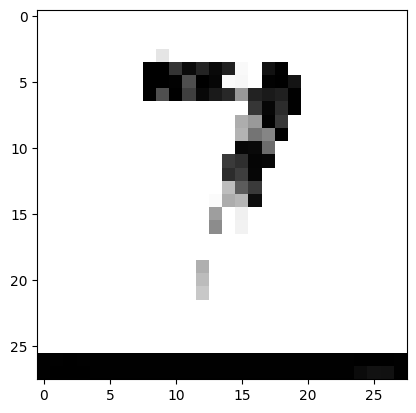

In [30]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [31]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [32]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [33]:
print("Arunkumar/212222040016")
print(x_single_prediction)

Arunkumar/212222040016
[7]
